# Uncertainty Analysis using loopUI

<a href="https://colab.research.google.com/github/gpirot/loopUI-demo/blob/main/uncertainty_analysis_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The $loopUI$ Python package provides several functions to analyse the variability among an ensemble of voxets. It allows the computation of local measures of uncertainty (cardinality and entropy) and of global dissimilarity measures (e.g. based on multiple-point statistical analysis or wavelet decomposition among other possibilities).

It is available with additional examples and notebooks on https://github.com/Loop3D/loopUI.

Here we are using a few of its functions to perform uncertainty analysis. We will consider a subset of models generated by geometrical null-space navigation to compute:
- local uncertainty indicators such as the cardinality or Shanon's entropy, as well as
- global uncertainty indicators based on histogram dissimilarities and wavelet decomposition. 

### Check running environement 
and install necessary libraries if on google-colab.

In [1]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab')
    !rm -rf loopUI-demo
    !git clone https://github.com/gpirot/loopUI-demo.git
    %cd loopUI-demo
    !ls
    !pip install numpy==1.26.4
    !pip install vtk==9.3.1
    !pip install scikit-learn
    !pip install PyWavelets
    !pip install loopui
else:
    print('Not running on CoLab')

Not running on CoLab


### Importing necessary libraries and functions

In [2]:
# LIBRARIES
import glob, os
import numpy as np
import loopui as ui
from datetime import datetime
import matplotlib.pyplot as plt
# FUNCTIONS FOR OUR ANALYSIS
from some_functions import natural_sort_key, extract_data_from_vts, plot_sections, plot_dissimilarity

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"IMPORTING LIBRARIES")
print('Using loopUI version '+ui.__version__)

# PARAMETERS TO LOAD MODELS AND DISPLAY SECTIONS
vts_folder = './models'
required_strings = 'm_curr_'
files='All'
nmodels = 50 # Number of models sub-sampled in the ensemble
ix,iy,iz = 27,34,15 # position index for sections orthogonal to x, y and z-axes 

07-Sep-2025 (16:49:20) - IMPORTING LIBRARIES
Using loopUI version 0.2


### Listing and sorting the files available in the vts_folder

In [3]:
# Gather all .vts files
all_vts_files = glob.glob(os.path.join(vts_folder, '*.vts'))

# Filter files based on required substrings
if required_strings:
    filtered_files = [
        f for f in all_vts_files if all(substring in os.path.basename(f) for substring in required_strings)
    ]
else:
    filtered_files = all_vts_files

# Sort naturally (e.g. file1, file2, file10)
if files=='All':
    vts_files = sorted(filtered_files, key=natural_sort_key)  # [::2]  # To do only 20 first plots [:20]
else:
    vts_files = sorted(filtered_files[::files], key=natural_sort_key)  # [::2]  # To do only 20 first plots [:20]

# Display the 10 last file names
vts_files[-10:]

['./models\\m_curr_88.vts',
 './models\\m_curr_89.vts',
 './models\\m_curr_90.vts',
 './models\\m_curr_91.vts',
 './models\\m_curr_92.vts',
 './models\\m_curr_93.vts',
 './models\\m_curr_94.vts',
 './models\\m_curr_95.vts',
 './models\\m_curr_98.vts',
 './models\\orig_m_curr.vts']

### Plotting a specific model
<span style="color:red">Exercise:</span> specify a file name in the variable `fname`.

In [4]:
# TO COMPLETE
fname = vts_files[-1]

<span style="color:red">Exercise:</span> extract the model using the `extract_data_from_vts` function by providing the file name as single argument.

In [5]:
# TO COMPLETE
data_tmp = extract_data_from_vts(fname)

Checking the shape of the data ...

In [6]:
(nz,nx,ny)=data_tmp.shape
print(fname+"(nz,nx,ny): "+str(data_tmp.shape))

./models\orig_m_curr.vts(nz,nx,ny): (31, 54, 68)


<span style="color:red">Exercise:</span> plot sections of the model using the `plot_sections(array,ix,iy,iz,cmap,title,label)` function by providing the following arguments:

- array: numpy array of the model
- ix: slice index on x-axis (default = 0)
- iy: slice index on y-axis (default = 0)
- iz: slice index on z-axis (default = 0)
- cmap: colormap (default = 'PuRd'),more examples on https://matplotlib.org/stable/users/explain/colors/colormaps.html
- title: of the figure (default = None)
- label: of the displayed values for the colorbar (default = None)

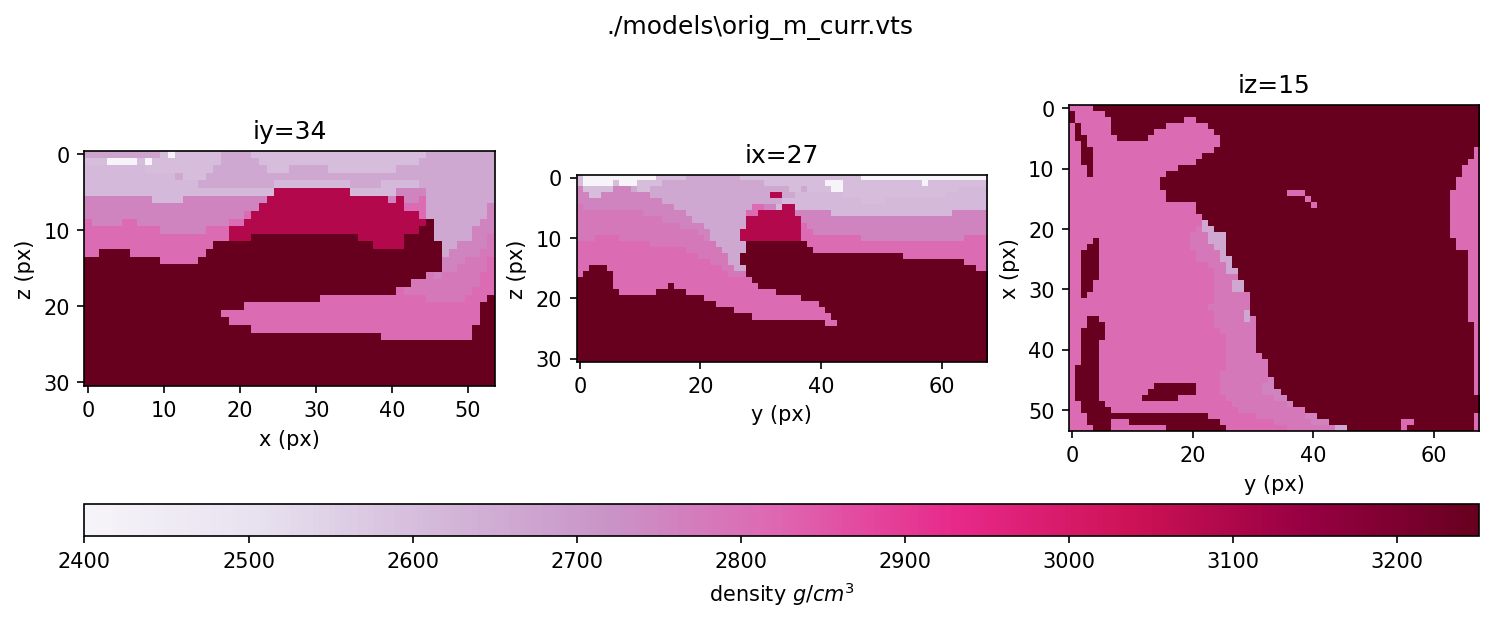

In [7]:
# TO COMPLETE
plot_sections(data_tmp,ix,iy,iz,cmap='PuRd',title=fname,label='density $g/cm^3$')

### Grouping the ensemble of models into a combined array for local uncertainty indicators
When possible $loopUI$ exploits the computing abilities of $numpy$ on arrays, which avoid the use of numerous for loops.

The ensemble of models is stored as a numpy array stacking the different modes along an addiional dimension.

In [8]:
model_ensemble = np.zeros((nz,nx,ny,nmodels))+np.nan

for i in range(nmodels):
    fname = vts_files[i]
    model_ensemble[:,:,:,i]= extract_data_from_vts(fname)
    # print(fname+" added to model_ensemble")

Let's have a look at the distribution of the density values in the continuous domain from our ensemble of realizations.

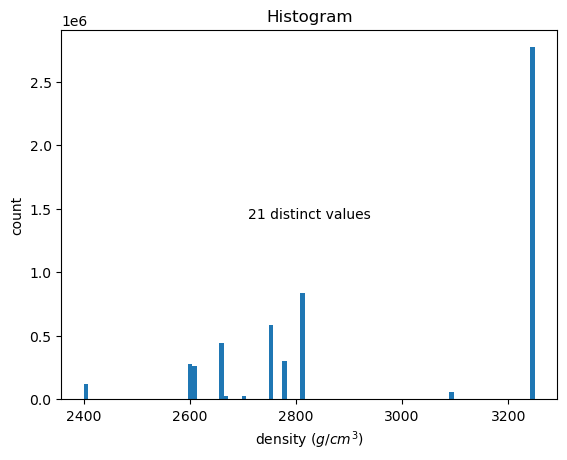

In [9]:
n_uniqueval = len(np.unique(model_ensemble.flatten()))

fig,ax = plt.subplots(1,1,dpi=100)
plt.hist(model_ensemble.flatten(),bins=100)
plt.text(0.5, 0.5, str(n_uniqueval)+' distinct values', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
plt.title('Histogram')
plt.ylabel('count')
plt.xlabel('density ($g/cm^3$)')
plt.show()

Let's regroup continuous values into categories to illustrate the use of indicators on categorical variables

In [10]:
f=50 # Rounding precision
model_ensemble_discrete = np.round(model_ensemble/f)*f # ensemble of categorized realizations
np.unique(model_ensemble_discrete.flatten()) # Set of unique categorical values

array([2400., 2600., 2650., 2700., 2750., 2800., 3100., 3250.])

### Compute local indicators on a categorical variable
<span style="color:red">Exercise:</span> call the `entropyNcardinality` function from $loopUI$ on the ensemble of categorized realizations (single arument).

In [11]:
# TO COMPLETE
ent,crd = ui.entropyNcardinality(model_ensemble_discrete)

<span style="color:red">Exercise:</span> look at the dimensions of the entropy or cardinality results and sompare them to the dimensions of a realization

In [12]:
#TO COMPLETE
print('Shape of \'ent\': '+str(ent.shape))

Shape of 'ent': (31, 54, 68)


<span style="color:red">Exercise:</span> call the `plot_sections` function to display sections of the entropy and cardinality. Adapt the title and label.

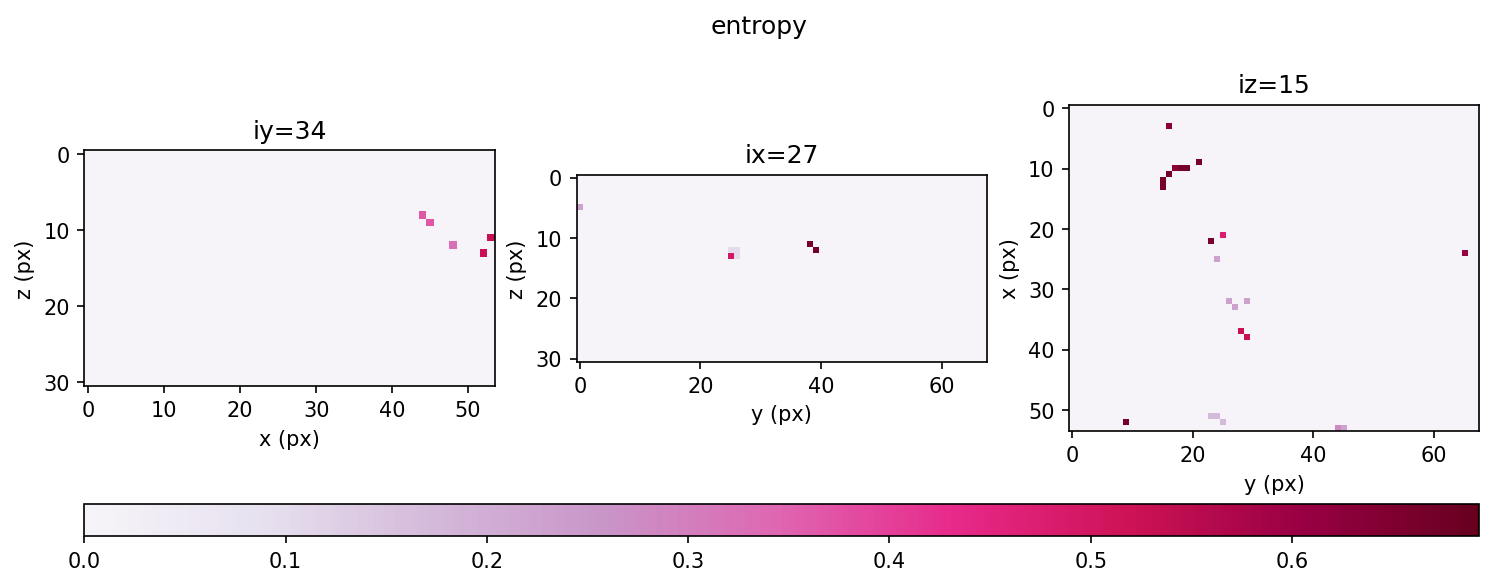

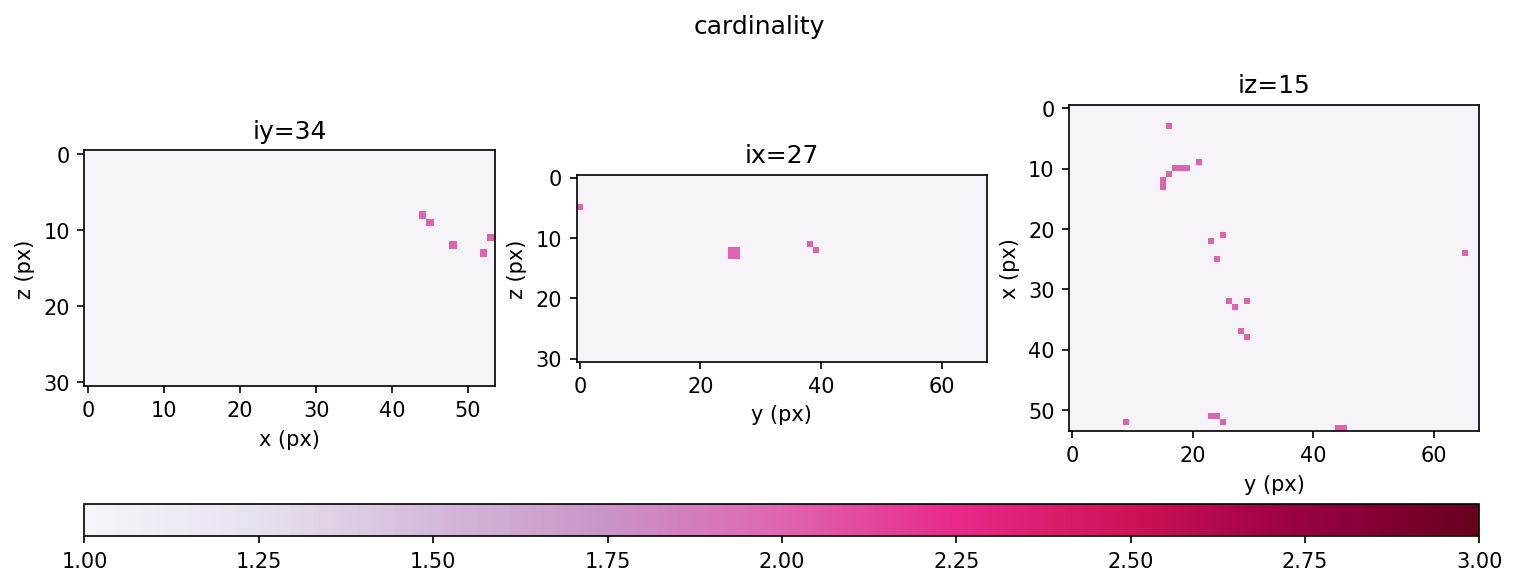

In [13]:
# TO COMPLETE
plot_sections(ent,ix,iy,iz,title='entropy')
plot_sections(crd,ix,iy,iz,title='cardinality')

It is possible to compute the continuous entropy on ensemble of continoius variable realizations, by using the `continuous_entropy` function and specifying a number of bins for discretization.

In [14]:
ent = ui.continuous_entropy(model_ensemble,nbins=100)

<span style="color:red">Exercise:</span> call the `plot_sections` function to display sections of the continuous entropy, adapt the title and label.

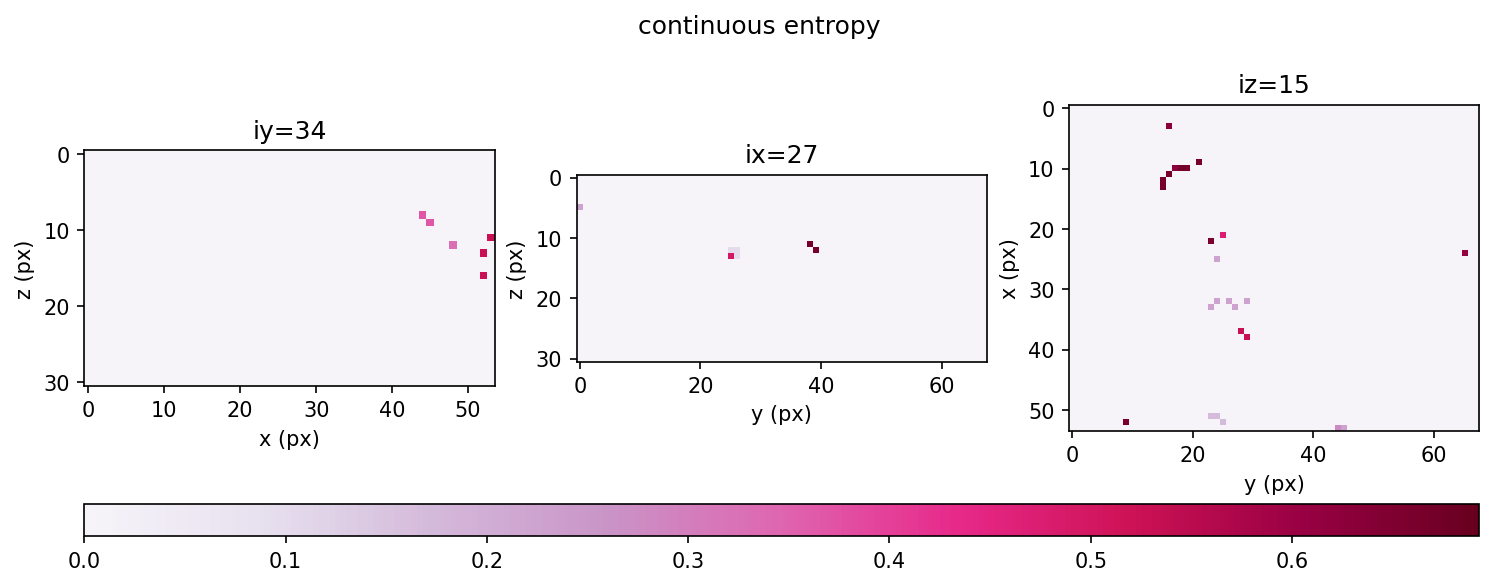

In [15]:
#TO COMPLETE
plot_sections(ent,ix,iy,iz,title='continuous entropy')

### Compute global uncertainty indicators on an ensemble of models

Now we are going to compute:
- summary statistics for each model of the sampled ensemble (of size $nmodels$) and then 
- the dissimilarity between the summary statistics for each pair of model ( $[nmodels\times(nmodels-1)]/2$ pairs).

The first summary statistics we compute is an histogram and the dissimilarity between two histogram is estimated with the Jensen-Shanon divergence (more details here: https://github.com/Loop3D/loopUI/blob/main/ui-3-hist.ipynb).

<span style="color:red">Exercise:</span> complete the block of code below to call the `jsdist_hist(model_1,model_2,nbins,base)` $loopUI$ function in order to populate the dissimilarity matrix (`dist_hist`). 

- `model_1`: 3D array of the first model to compare
- `model_2`: 3D array of the second model to compare
- `nbins`: number of bins of the histogram
- `base`: logarithmique base for the computation of the Jensen-Shanon divergence

In [16]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DIST ALL START")

# PARAMETERS FOR THE jsdist_hist FUNCTION
nbins = -1
base = 10#np.exp(1)

# INITIALIZE THE DISTANCE OR DISSIMILARITY MATRIX
dist_hist = np.zeros((nmodels,nmodels))

k=0
for i in range(nmodels):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_hist[i,j] = ui.jsdist_hist(model_ensemble[:,:,:,i],model_ensemble[:,:,:,j],nbins,base) # TO COMPLETE
        dist_hist[j,i] = dist_hist[i,j] # TO COMPLETE
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING HISTOGRAM BASED DIST ALL END")

07-Sep-2025 (16:49:28) - COMPUTING HISTOGRAM BASED DIST ALL START
07-Sep-2025 (16:49:28) - k = 1 - i = 1 j =  0
07-Sep-2025 (16:49:28) - k = 2 - i = 2 j =  0
07-Sep-2025 (16:49:28) - k = 3 - i = 2 j =  1
07-Sep-2025 (16:49:28) - k = 4 - i = 3 j =  0
07-Sep-2025 (16:49:28) - k = 5 - i = 3 j =  1
07-Sep-2025 (16:49:28) - k = 6 - i = 3 j =  2
07-Sep-2025 (16:49:28) - k = 7 - i = 4 j =  0
07-Sep-2025 (16:49:28) - k = 8 - i = 4 j =  1
07-Sep-2025 (16:49:28) - k = 9 - i = 4 j =  2
07-Sep-2025 (16:49:28) - k = 10 - i = 4 j =  3
07-Sep-2025 (16:49:28) - k = 11 - i = 5 j =  0
07-Sep-2025 (16:49:28) - k = 12 - i = 5 j =  1
07-Sep-2025 (16:49:28) - k = 13 - i = 5 j =  2
07-Sep-2025 (16:49:28) - k = 14 - i = 5 j =  3
07-Sep-2025 (16:49:28) - k = 15 - i = 5 j =  4
07-Sep-2025 (16:49:28) - k = 16 - i = 6 j =  0
07-Sep-2025 (16:49:28) - k = 17 - i = 6 j =  1
07-Sep-2025 (16:49:28) - k = 18 - i = 6 j =  2
07-Sep-2025 (16:49:28) - k = 19 - i = 6 j =  3
07-Sep-2025 (16:49:28) - k = 20 - i = 6 j =  4
07-

Now, let's plot the dissimilarity matrix and project the models in a Multi-Dimensional Scaling space:

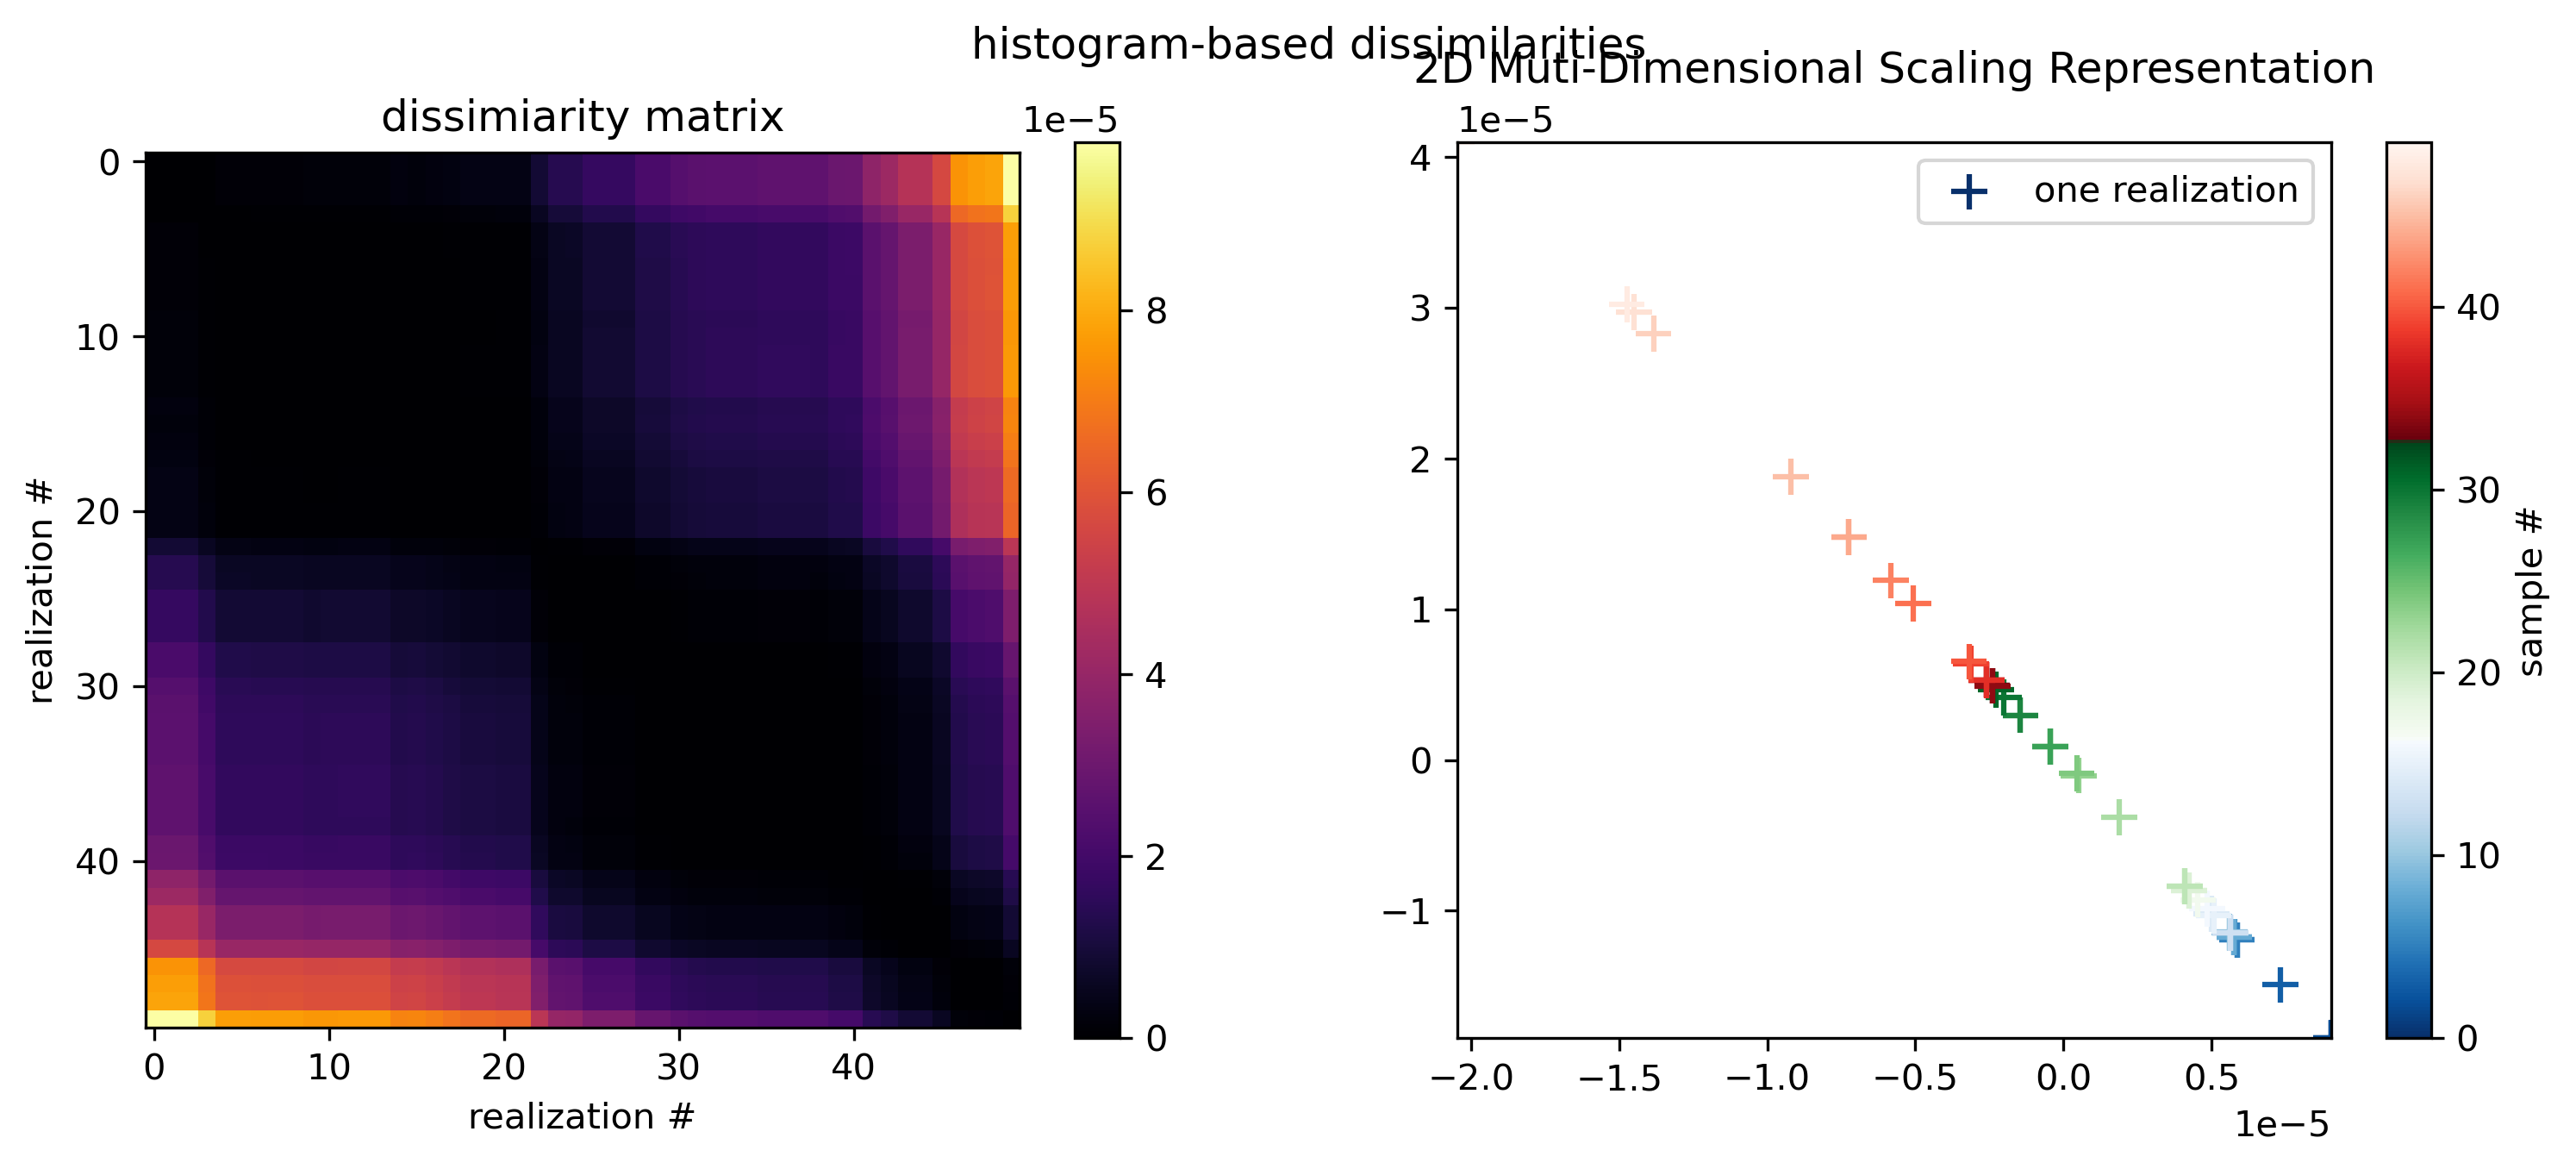

In [17]:
fig_1 = plot_dissimilarity(distance_mx=dist_hist,title='histogram-based dissimilarities')    

The second summary statistics we compute are histograms obtained by wavelet decomposition and the dissimilarity between histograms is estimated with the Jensen-Shanon divergence (more details here: https://github.com/Loop3D/loopUI/blob/main/ui-7-wavelet.ipynb).

<span style="color:red">Exercise:</span> complete the block of code below to call the `dist_wavelet(model_1,model_2,n_levels,n_bins)` $loopUI$ function in order to populate the dissimilarity matrix (`dist_hist`). 

- `model_1`: 3D array of the first model to compare
- `model_2`: 3D array of the second model to compare
- `n_levels`: number of wavelet decompostition levels
- `n_bins`: number of bins per histogram


In [18]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST ALL START")

# PARAMETERS OF dist_wavelet THE FUNCTION
n_levels=4
n_bins=20

# INITIALIZE THE DISTANCE OR DISSIMILARITY MATRIX
dist_wvt = np.zeros((nmodels,nmodels))

k=0
for i in range(nmodels):
    for j in range(i):
        k+=1
        print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+'k = '+str(k)+' - i = '+str(i)+' j = ',str(j))
        dist_wvt[i,j] = ui.dist_wavelet(model_ensemble[:,:,:,i],model_ensemble[:,:,:,j],n_levels,n_bins) # TO COMPLETE
        dist_wvt[j,i] = dist_wvt[i,j] # TO COMPLETE

print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING WAVELET BASED DIST ALL END")


07-Sep-2025 (16:49:54) - COMPUTING WAVELET BASED DIST ALL START
07-Sep-2025 (16:49:54) - k = 1 - i = 1 j =  0
07-Sep-2025 (16:49:54) - k = 2 - i = 2 j =  0
07-Sep-2025 (16:49:54) - k = 3 - i = 2 j =  1
07-Sep-2025 (16:49:54) - k = 4 - i = 3 j =  0
07-Sep-2025 (16:49:54) - k = 5 - i = 3 j =  1
07-Sep-2025 (16:49:55) - k = 6 - i = 3 j =  2
07-Sep-2025 (16:49:55) - k = 7 - i = 4 j =  0
07-Sep-2025 (16:49:55) - k = 8 - i = 4 j =  1
07-Sep-2025 (16:49:55) - k = 9 - i = 4 j =  2
07-Sep-2025 (16:49:55) - k = 10 - i = 4 j =  3
07-Sep-2025 (16:49:55) - k = 11 - i = 5 j =  0
07-Sep-2025 (16:49:55) - k = 12 - i = 5 j =  1
07-Sep-2025 (16:49:55) - k = 13 - i = 5 j =  2
07-Sep-2025 (16:49:55) - k = 14 - i = 5 j =  3
07-Sep-2025 (16:49:55) - k = 15 - i = 5 j =  4
07-Sep-2025 (16:49:55) - k = 16 - i = 6 j =  0
07-Sep-2025 (16:49:55) - k = 17 - i = 6 j =  1
07-Sep-2025 (16:49:55) - k = 18 - i = 6 j =  2
07-Sep-2025 (16:49:55) - k = 19 - i = 6 j =  3
07-Sep-2025 (16:49:55) - k = 20 - i = 6 j =  4
07-Se

Now, let's plot the dissimilarity matrix and project the models in a Multi-Dimensional Scaling space:

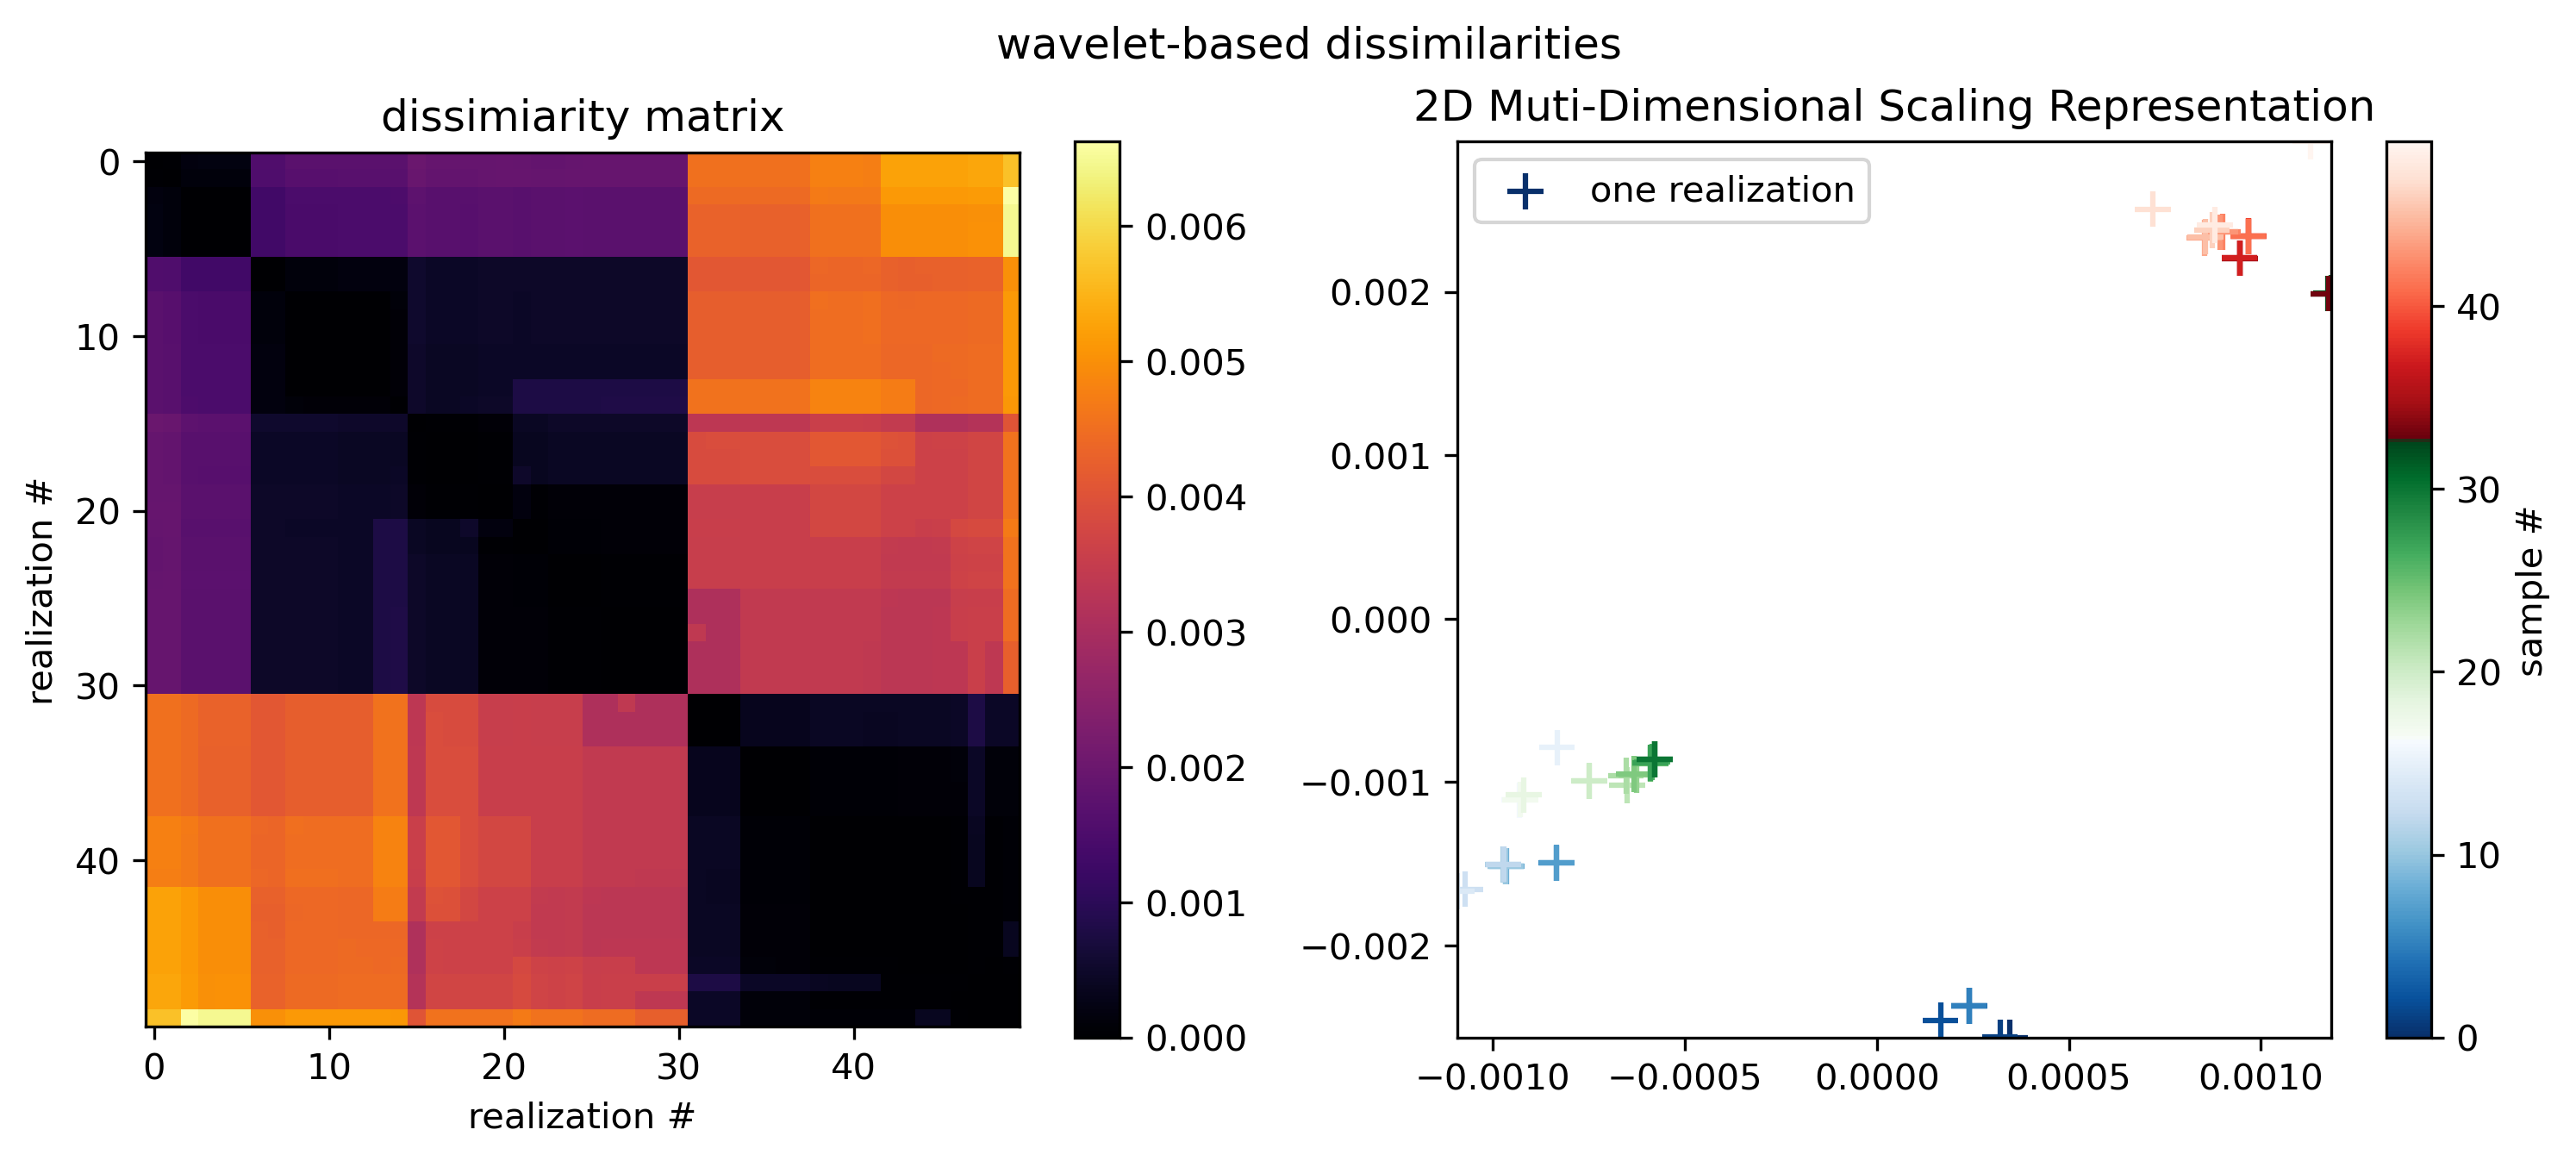

In [19]:
fig_2 = plot_dissimilarity(distance_mx=dist_wvt,title='wavelet-based dissimilarities')    